<a href="https://colab.research.google.com/github/AlexandrosMaragkakis/uni_ml_projects/blob/main/kdd99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-30-b5ad50f5b47c>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 1] = encoder.fit_transform(X.iloc[:, 1])  # Encode the protocol_type feature
<ipython-input-30-b5ad50f5b47c>:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 2] = encoder.fit_transform(X.iloc[:, 2])  # Encode the service feature
<ipython-input-30-b5ad50f5b47c>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use e

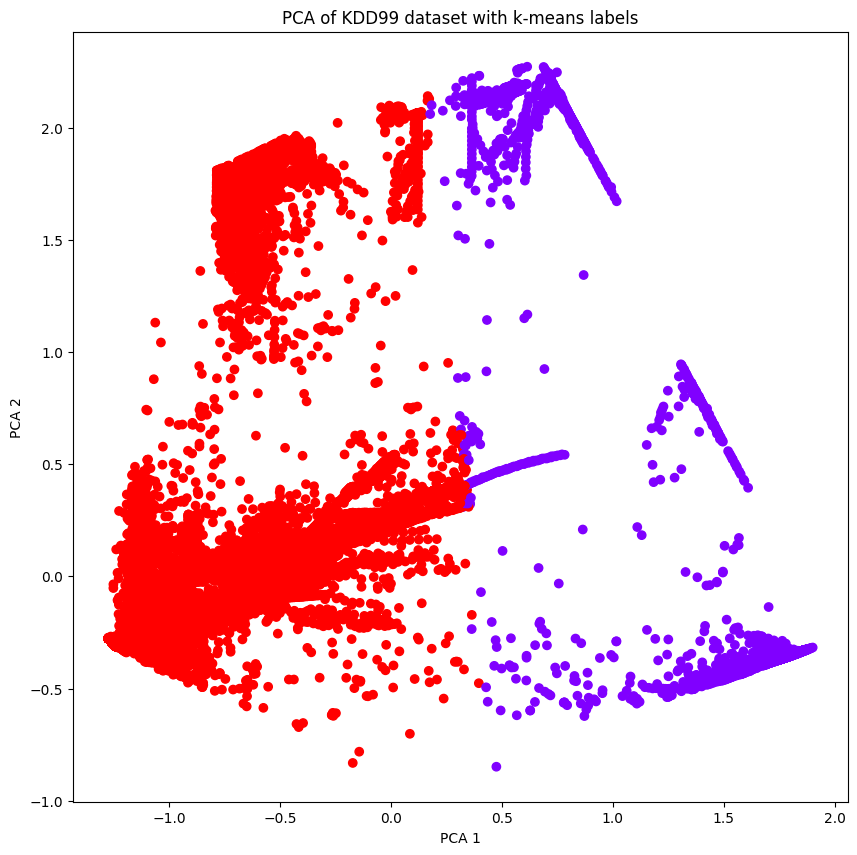

Percentage of normal in cluster 0: 0.05674510100627979%
Percentage of normal in cluster 1: 94.69994391475042%
Percentage of attack in cluster 0: 99.94325489899371%
Percentage of attack in cluster 1: 5.3000560852495795%


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the data
from sklearn.datasets import fetch_kddcup99
data = fetch_kddcup99(return_X_y=True, percent10=True) # Load only 10% of the whole dataset
X = data[0]
y = data[1]

# Byte string b'normal.'
# Change the target values to 'normal' for normal and 'attack' for everything else
y = pd.Series(y).apply(lambda x: 'normal' if x == b'normal.' else 'attack').values

# Load the data into a dataframe
X = pd.DataFrame(X)

# Remove duplicates from the dataframe
X.drop_duplicates(inplace=True)

# Remove the corresponding rows in the targets array
y = y[X.index] # Select only the target values that match the dataframe index

# Use LabelEncoder for the categorical values
encoder = LabelEncoder()
X.iloc[:, 1] = encoder.fit_transform(X.iloc[:, 1])  # Encode the protocol_type feature
X.iloc[:, 2] = encoder.fit_transform(X.iloc[:, 2])  # Encode the service feature
X.iloc[:, 3] = encoder.fit_transform(X.iloc[:, 3])  # Encode the flag feature


# Use MinMaxScaler for scaling the values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)



# Apply k-means with k=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Visualize the results using PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of KDD99 dataset with k-means labels')
plt.show()

# Find out the percentages of the 'normal' and 'attack' on each cluster
cluster_0 = y[labels == 0] # Select the target values for cluster 0
cluster_1 = y[labels == 1] # Select the target values for cluster 1

normal_0 = (cluster_0 == 'normal').sum() / len(cluster_0) * 100 # Calculate the percentage of normal in cluster 0
normal_1 = (cluster_1 == 'normal').sum() / len(cluster_1) * 100 # Calculate the percentage of normal in cluster 1

attack_0 = (cluster_0 == 'attack').sum() / len(cluster_0) * 100 # Calculate the percentage of attack in cluster 0
attack_1 = (cluster_1 == 'attack').sum() / len(cluster_1) * 100 # Calculate the percentage of attack in cluster 1

print(f'Percentage of normal in cluster 0: {normal_0}%')
print(f'Percentage of normal in cluster 1: {normal_1}%')
print(f'Percentage of attack in cluster 0: {attack_0}%')
print(f'Percentage of attack in cluster 1: {attack_1}%')

#### ASSOCIATION RULES

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder

# Load the KDD Cup 99 dataset
data = fetch_kddcup99(return_X_y=True, percent10=True)
X = data[0]

# Convert the dataset to a pandas DataFrame
X = pd.DataFrame(X)

# Drop duplicates from the DataFrame
X.drop_duplicates(inplace=True)

# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = label_encoder.fit_transform(X[column])

# Convert the DataFrame into a transactional dataset
transactions = []
for row in X.iterrows():
    transaction = [str(row[1][column]) for column in X.columns]
    transactions.append(transaction)

# Convert the transactional dataset to a DataFrame
transactions_df = pd.DataFrame(transactions)

# Apply one-hot encoding to the transactional DataFrame
one_hot_encoded = pd.get_dummies(transactions_df)

# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and association rules
print(frequent_itemsets)
print(rules)


In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder

# Load the KDD Cup 99 dataset
data = fetch_kddcup99(percent10=True)
#X = data[0]

# Convert the dataset to a pandas DataFrame
#X = pd.DataFrame(X)

In [ ]:
X = data.data
X = pd.DataFrame(X, columns=data.feature_names)

In [ ]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

same_srv_rate src_bytes diff_srv_rate count dst_host_srv_count  flag  \
0                1.0       181           0.0     8                  9     9   
1                1.0       239           0.0     8                 19     9   
2                1.0       235           0.0     8                 29     9   
3                1.0       219           0.0     6                 39     9   
4                1.0       217           0.0     6                 49     9   
...              ...       ...           ...   ...                ...   ...   
494016           1.0       310           0.0     4                255     9   
494017           1.0       282           0.0     6                255     9   
494018           1.0       203           0.0     6                255     9   
494019           1.0       291           0.0     6                255     9   
494020           1.0       219           0.0     6                255     9   

       dst_host_same_srv_rate serror_rate dst_host_serror_rate srv_serror_rate  
0                         1.0         0.0                  0.0             0.0  
1                         1.0         0.0                  0.0             0.0  
2                         1.0         0.0                  0.0             0.0  
3                         1.0         0.0                  0.0             0.0  
4                         1.0         0.0                  0.0             0.0  
...                       ...         ...                  ...             ...  
494016                    1.0         0.0                  0.0             0.0  
494017                    1.0         0.0                  0.0             0.0  
494018                    1.0        0.17                 0.06            0.11  
494019                    1.0         0.0                 0.04             0.0  
494020                    1.0         0.0                  0.0             0.0  

[145584 rows x 10 columns]

In [7]:
import pandas as pd
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Load KDD99 dataset
kdd_data = fetch_kddcup99(as_frame=True)
X = kdd_data.data

# Preprocess categorical features using LabelEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
X_categorical = X[categorical_cols]
X_categorical_encoded = X_categorical.apply(LabelEncoder().fit_transform)

# Apply Apriori algorithm with chunking
chunk_size = 10000
total_samples = X.shape[0]
frequent_itemsets = None

for chunk_start in range(0, total_samples, chunk_size):
    chunk_end = min(chunk_start + chunk_size, total_samples)
    X_chunk = pd.concat([X_categorical_encoded.iloc[chunk_start:chunk_end], X.iloc[chunk_start:chunk_end].select_dtypes(exclude=['object'])], axis=1)
    
    te = TransactionEncoder()
    te_ary = te.fit(X_chunk.values).transform(X_chunk.values)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
    chunk_frequent_itemsets = apriori(df_encoded, min_support=0.8, use_colnames=True)
    
    if frequent_itemsets is None:
        frequent_itemsets = chunk_frequent_itemsets
    else:
        frequent_itemsets = pd.concat([frequent_itemsets, chunk_frequent_itemsets])




In [8]:
frequent_itemsets = frequent_itemsets.drop_duplicates()

In [9]:
# Assuming 'frequent_itemsets' is the dataframe containing the frequent itemsets
# Assuming 'X_categorical_encoded' is the preprocessed categorical features dataframe

for index, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']
    items = list(itemset)  # Convert frozenset to a list
    
    # Map the encoded items back to their original categorical values
    original_items = []
    for item in items:
        for col in X_categorical_encoded.columns:
            if X_categorical_encoded[col].values[0] == item:
                original_items.append(col)
                break
    
    print("Itemset:", original_items)


Streaming output truncated to the last 5000 lines.
Itemset: ['duration', 'dst_host_same_srv_rate', 'flag']
Itemset: ['duration', 'dst_host_same_srv_rate', 'flag']
Itemset: ['duration', 'flag']
Itemset: ['duration', 'flag']
Itemset: ['duration', 'flag']
Itemset: ['duration', 'flag']
Itemset: ['duration', 'same_srv_rate', 'dst_host_same_srv_rate']
Itemset: ['duration', 'same_srv_rate', 'dst_host_same_srv_rate']
Itemset: ['duration', 'same_srv_rate']
Itemset: ['duration', 'same_srv_rate']
Itemset: ['duration', 'same_srv_rate']
Itemset: ['duration', 'same_srv_rate']
Itemset: ['duration', 'same_srv_rate']
Itemset: ['duration', 'dst_host_same_srv_rate']
Itemset: ['duration', 'dst_host_same_srv_rate']
Itemset: ['duration', 'dst_host_same_srv_rate']
Itemset: ['duration', 'dst_host_same_srv_rate']
Itemset: ['duration', 'dst_host_same_srv_rate']
Itemset: ['duration']
Itemset: ['duration']
Itemset: ['duration']
Itemset: ['duration']
Itemset: ['duration', 'same_srv_rate', 'dst_host_same_srv_rate']

In [10]:
from mlxtend.frequent_patterns import association_rules

# Assuming 'frequent_itemsets' is the dataframe containing the frequent itemsets

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the first 10 rules
for i, row in rules.head(10).iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Rule #{i+1}:")
    print("Antecedents:", antecedents)
    print("Consequents:", consequents)
    print("Support:", support)
    print("Confidence:", confidence)
    print("Lift:", lift)
    print("------------------------")


Rule #1:
Antecedents: [0]
Consequents: [9]
Support: 0.9980104451628948
Confidence: 0.9980104451628948
Lift: 1.0
------------------------
Rule #2:
Antecedents: [9]
Consequents: [0]
Support: 0.9980104451628948
Confidence: 1.0
Lift: 1.0
------------------------
Rule #3:
Antecedents: [0]
Consequents: [98]
Support: 0.978363591146481
Confidence: 0.978363591146481
Lift: 1.0
------------------------
Rule #4:
Antecedents: [98]
Consequents: [0]
Support: 0.978363591146481
Confidence: 1.0
Lift: 1.0
------------------------
Rule #5:
Antecedents: [0]
Consequents: [100]
Support: 0.9788
Confidence: 0.9788
Lift: 1.0
------------------------
Rule #6:
Antecedents: [100]
Consequents: [0]
Support: 0.9788
Confidence: 1.0
Lift: 1.0
------------------------
Rule #7:
Antecedents: [0]
Consequents: [255]
Support: 0.906988311365332
Confidence: 0.906988311365332
Lift: 1.0
------------------------
Rule #8:
Antecedents: [255]
Consequents: [0]
Support: 0.906988311365332
Confidence: 1.0
Lift: 1.0
---------------------